# Moving Average

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the data 
df = pd.read_csv("../data/prices_scores_clean.csv")

# renaming the date column as "date"
df.rename(columns={"Unnamed: 0": "date"}, inplace=True)

# setting date column as index 
df.set_index('date',inplace=True)

In [3]:
# final data frame
df

,price,BTC_score,twitter_score,reddit_score
date,,,,
2018-02-01,9052.5763,0.496911,0.569701,0.429601
2018-02-02,8827.6300,0.479340,0.552322,0.430662
2018-02-03,9224.3913,0.495011,0.585380,0.453424
2018-02-04,8186.6488,0.499830,0.554089,0.444839
2018-02-05,6914.2600,0.469328,0.529476,0.438090
...,...,...,...,...
2021-01-27,30425.3933,0.451524,0.568092,0.512576
2021-01-28,33420.0450,0.461012,0.588805,0.541803
2021-01-29,34264.0100,0.497264,0.614617,0.575444


## Simple moving average 

Simple Moving Average (SMA) uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data.
in our case, we are taking n=7 days as the time period to calculate the average.

In [4]:
# creating a new column for the simple moving average
df['SMA_7'] = df["price"].rolling(window=7).mean()

# calculating the absolute error between the actual price and simple moving average 
df["simple_absolute_error"] = np.abs(df["price"] - df["SMA_7"])
print ("the simple mean Absolute error is : {}".format(df["simple_absolute_error"].mean()))

the simple mean Absolute error is : 353.2632356897398


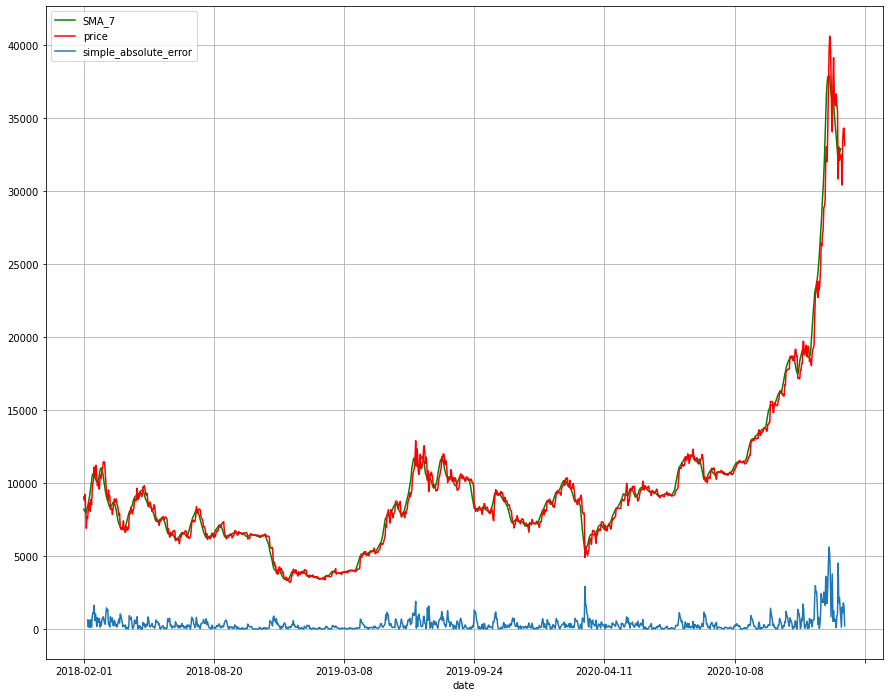

In [5]:
# plotting the difference between the actual price and the Simple moving average.
plt.figure(figsize=(15,12)) # increased the figure size 
df['SMA_7'].dropna().plot(c="green") # just dropped the nan values, since it is 7 days average, the other days will have nan values.
df["price"].plot(c="red")
df["simple_absolute_error"].plot()
plt.legend()
plt.grid(True)

As we can see here:
1. the Simple moving average is quiet accurate predicting the general model
2. it is lagging a bit when there is a high jump in the trend 
3. there is not much difference between the 7 days and 3 days moving average 
4. it can be used as baseline model, but lets explore a bit more to see if we can optimize it more !

## Cumulative moving average 

Unlike simple moving average which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations. CMA is not a very good technique for analyzing trends and smoothing out the data. The reason being, it averages out all of the previous data up until the current data point. So we are not expecting a better result with the CMA.

In [6]:
df['CMA_7'] = df["price"].expanding(min_periods=7).mean()
df.dropna(inplace=True)
# calculating the absolute error between the actual price and cumulative moving average 
df["cumulative_absolute_error"] = np.abs(df["price"] - df["CMA_7"])
print ("the cumulative mean Absolute error is : {}".format(df["cumulative_absolute_error"].mean()))

the cumulative mean Absolute error is : 3305.890194732223


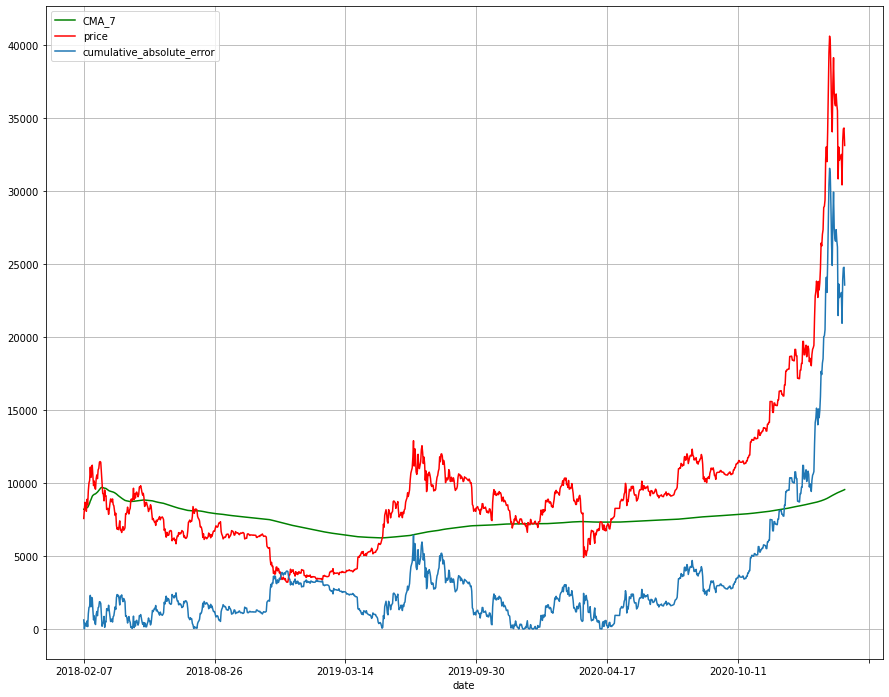

In [7]:
# plotting the difference between the actual price and the Cumulative moving average.
plt.figure(figsize=(15,12)) # increased the figure size 
df['CMA_7'].dropna().plot(c="green") # just dropped the nan values, since it is 7 days average, the other days will have nan values.
df["price"].plot(c="red")
df["cumulative_absolute_error"].plot()
plt.legend()
plt.grid(True)

as we can see clearly the cumulative moving average is far worse than our simple moving average, the reason being is because it takes into account the previous moving averages into account, which makes it much more smoother but in the same time it is also much harder to pick quick jumps in the trend. 

## Exponential Moving Average

Unlike SMA and CMA, exponential moving average gives more weight to the recent prices and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data.

Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.

In [8]:
df['EMA_7'] = df["price"].ewm(span=7,adjust=False).mean()
df.dropna(inplace=True)
# calculating the absolute error between the actual price and exponential moving average 
df["exponential_absolute_error"] = np.abs(df["price"] - df["EMA_7"])
print ("the exponential mean Absolute error is : {}".format(df["exponential_absolute_error"].mean()))

the exponential mean Absolute error is : 298.04777457928844


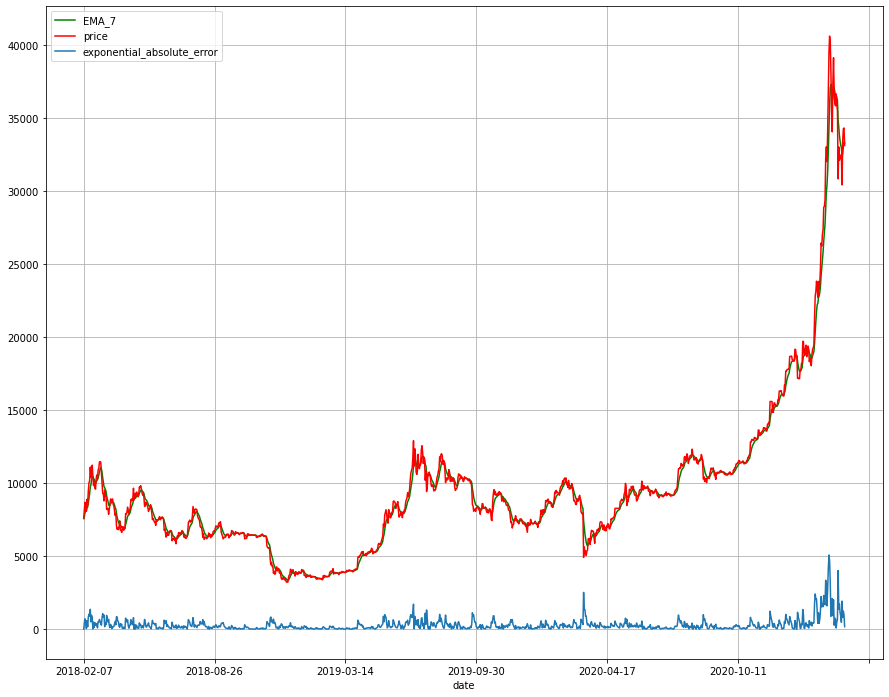

In [9]:
# plotting the difference between the actual price and the exponential moving average.
plt.figure(figsize=(15,12)) # increased the figure size 
df['EMA_7'].dropna().plot(c="green") # just dropped the nan values, since it is 7 days average, the other days will have nan values.
df["price"].plot(c="red")
df["exponential_absolute_error"].plot()
plt.legend()
plt.grid(True)

the graph shows much better results than the cumulative moving average, and slightly better than simple moving average.

## Prediction

In [77]:
df["value"][-20:]

date
2021-02-10    44855.6167
2021-02-11    48004.6533
2021-02-12    47410.4033
2021-02-13    47211.6683
2021-02-14    48633.2600
2021-02-15    47934.1267
2021-02-16    49185.7283
2021-02-17    52127.3200
2021-02-18    51573.4067
2021-02-19    55923.1300
2021-02-20    55898.4400
2021-02-21    57441.6000
2021-02-22    54117.4950
2021-02-23    48901.0167
2021-02-24    49734.5200
2021-02-25    47104.7833
2021-02-26    46329.7400
2021-02-27    46189.3783
2021-02-28    45256.4133
2021-03-01    49619.6433
Name: value, dtype: float64

In [88]:
((df["value"][-8:-2].mean())) # predicted value for 2021-03-01

48729.48888333333

In [97]:
df["value"][-1] # actual value for 2021-03-01

49619.6433

In [123]:
error_1 = np.abs(((df["value"][-8:-2].mean()))-df["value"][-1]) # absolute difference in value (error)
error_1

890.1544166666718

In [124]:
((df["value"][-9:-3].mean())) # predicted value for 2021-02-01

50604.85916666667

In [125]:
df["value"][-2] # actual value for 2021-02-01

45256.4133

In [126]:
error_2 = np.abs(((df["value"][-9:-3].mean()))-df["value"][-2]) # difference in value (error)
error_2 

5348.445866666669

In [127]:
((df["value"][-10:-4].mean())) # predicted value for 2021-01-01

52199.64250000001

In [128]:
df["value"][-3]  # actual value for 2021-01-01

46189.3783

In [129]:
error_3 = np.abs(((df["value"][-10:-4].mean()))-df["value"][-3]) # difference in value (error)
error_3

6010.264200000012

In [130]:
print ("mean absolut error: {}".format((error_1 + error_2 + error_3)/3))

mean absolut error: 4082.9548277777844


In [62]:
def seven_days_predict(df):
    for X in df:
        df[]

In [63]:
seven_days_predict(df)

value


## Conclusion

In conclusion a simple 7 days moving average shows the best outcome.

In [ ]:
df